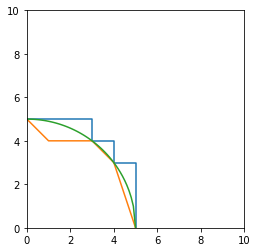

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

#Idea for approximating pi: 
#Trace out an upper and lower boundary of a circle of radius r in the 1st quadrant, using integer coordinates
#r is any positive integer (large to actually get a good approximation of pi)
#Calculate the area under the upper boundary (AUB) and the area under the lower boundary (ALB)
#pi/4 will be between AUB/r^2 and ALB/r^2
def getUpperLowerBounds(radius):
    y = radius
    distSq = radius*radius
    upperBounds = []
    upperBoundsXCoords = []
    lowerBounds = []
    for x in xrange(radius):
        xSq = x*x
        while not (y*y+xSq <= distSq and (y+1)*(y+1)+xSq > distSq):
            y -= 1
        #If (x,y) is exactly on the circle, we can use
        #y as both upper and lower bound
        nextUpperBound = 0
        if (y*y+xSq==distSq):
            nextUpperBound = y
        else:
            nextUpperBound = y+1
        lowerBounds.append(y)
        #Add rectangular indent behind current point
        #Upper bound edge will all be made of 90 degree angles unlike lower bound edge
        if len(upperBounds) > 0 and upperBounds[-1]!=nextUpperBound:
            upperBoundsXCoords.append(x)
            upperBounds.append(upperBounds[-1])
        upperBoundsXCoords.append(x)
        upperBounds.append(nextUpperBound)
    upperBoundsXCoords.append(radius)
    upperBounds.append(upperBounds[-1])
    upperBoundsXCoords.append(radius)
    upperBounds.append(0)
    lowerBounds.append(0)
    return [upperBoundsXCoords,upperBounds,lowerBounds]

#Let's graph this for a small radius
radius = 5
pts = getUpperLowerBounds(radius)
fig, ax = plt.subplots()
ax.set_aspect(1.0)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
plt.plot(pts[0],pts[1])
plt.plot(pts[2])
plt.plot([0.1*i for i in range(0,10*radius+1)],[math.sqrt(radius*radius-0.1*i*0.1*i) for i in range(0,10*radius+1)])
#Upper bound is given by the area under the blue line, lower bound is given by the area under the orange line!

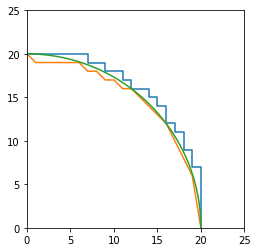

In [82]:
#Now a bigger radius...
radius = 20
pts = getUpperLowerBounds(radius)
fig, ax = plt.subplots()
ax.set_aspect(1.0)
ax.set_xlim(0,25)
ax.set_ylim(0,25)
plt.plot(pts[0],pts[1])
plt.plot(pts[2])
plt.plot([0.1*i for i in range(0,10*radius+1)],[math.sqrt(radius*radius-0.1*i*0.1*i) for i in range(0,10*radius+1)])

In [83]:
#Actual code for calculating upper and lower bounds of pi:
def getPiBounds(radius):
    ub = 0
    lb = 0
    y = radius
    distSq = radius*radius
    for x in xrange(radius):
        xSq = x*x
        while not (y*y+xSq <= distSq and (y+1)*(y+1)+xSq > distSq):
            y -= 1
        #If (x,y) is exactly on the circle, we can use
        #y as both upper and lower bound
        if (y*y+xSq==distSq):
            ub += y
        else:
            ub += y+1
        lb += y
    #Lower bound uses trapezoid rule
    lb = float(2*lb-radius)/2
    return (4*float(ub)/distSq,4*lb/distSq)

print getPiBounds(5)
print getPiBounds(20)
print getPiBounds(10000)
#Test to make sure we are calculating areas right: By looking at the above graph, 
#the upper & lower bounds for radius = 5 look like (4.5+4+4+3.5+1.5)/25 (lower) and
#(5*3+4+3)/25 (upper)
assert getPiBounds(5)==(4*float(5*3+4+3)/25,4*float(4.5+4+4+3.5+1.5)/25)

(3.52, 2.8)
(3.31, 3.04)
(3.14199016, 3.14139052)


In [107]:
#Setting radius = 100 million gets 7 correct digits after the decimal point
#Takes about 2.5 minutes on my VM
import timeit
t = timeit.Timer('x = getPiBounds(100000000); print x', 'from __main__ import getPiBounds')
time = t.timeit(1)
print "Took "+str(time)+" seconds"

(3.141592693586789, 3.141592633586796)
Took 145.379392 seconds
